###Prediction Using Supervised Machine Learning model 

Importing the libraries

In [27]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

Importing the dataset

In [28]:
# Reading data from url
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data Imported")

Data Imported


In [29]:
#Here we used head which is a function to print first 5 rows of the dataframe
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Plotting the given data

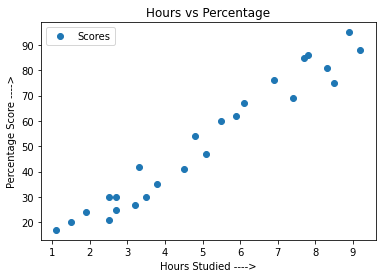

In [30]:
# Plotting our data into 2D to understand the distribution of data and the relationship between the scores and hours of study
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied ---->')  
plt.ylabel('Percentage Score ---->')  
plt.show()

Here we can observe that there is a positive co-relation between the number of hours studied and percentage of score.

Preparing the data

In [31]:
# selecting the values of data from the dataframe
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now we will split the data values into training and test samples

In [32]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Training the Model

In [33]:
#sample data taken for training are trained using Linear Regression model's algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Data Is trained successfully")

Data Is trained successfully


Regression Model Evaluation

In [34]:
#finding the value of the intercept and slop using the formula
print("Slope value: ", regressor.coef_)
print("Intercept value: ", regressor.intercept_)


Slope value:  [9.91065648]
Intercept value:  2.018160041434662


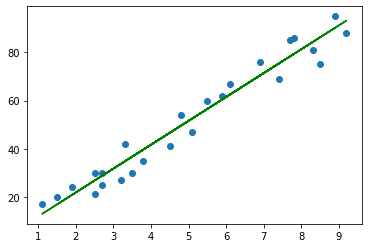

In [35]:
# Plotting the trained regression model in the graph
model = regressor.coef_*X+regressor.intercept_

# Plotting for the test data with green line
plt.scatter(X, y)
plt.plot(X, model, color='green');
plt.show()

Making Predictions using trained data, Now we have trained algorithm to make some predictions.

In [36]:
y_pred = regressor.predict(X_test) # Predicting the scores
print("Hours Spent: ", X_test) # Testing data - In Hours

Hours Spent:  [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


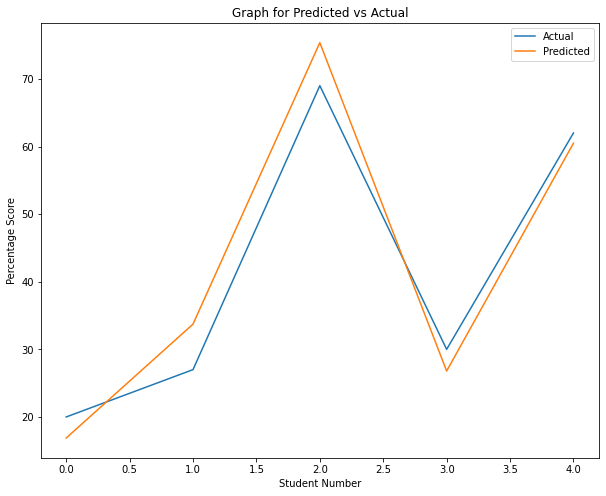

In [40]:
df1.plot(kind='line',figsize=(10,8))
plt.title('Graph for Predicted vs Actual')
plt.xlabel('Student Number')
plt.ylabel('Percentage Score')
plt.show()


Getting the accuracy of the model: Predicting the scores of a student if he/she studies for 9.25 hrs/ day

In [41]:
# Predict the scores of the student with the given hours of study
hours = 9.25
fin_pred = round(regressor.predict([[9.25]]) [0], 2)
#fin_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(fin_pred))

No of Hours = 9.25
Predicted Score = 93.69


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
